# Image Resizing Assignment

- Name:yousef ali
- Reg.No:20101108

1. Reading and plotting an image along with its histogram.
2. Performing upsampling using three different techniques.
3. Performing downsampling using three different techniques.
4. Visual comparison of the upsampled and downsampled images.

## Table of Contents
1. [Import Libraries](#Import-Libraries)
2. [Load and Display the Image](#Load-and-Display-the-Image)
3. [Plot the Histogram](#Plot-the-Histogram)
4. [Upsampling Techniques](#Upsampling-Techniques)
    - [Nearest Neighbor Interpolation](#Nearest-Neighbor-Interpolation)
    - [Bilinear Interpolation](#Bilinear-Interpolation)
    - [Bicubic Interpolation](#Bicubic-Interpolation)
5. [Downsampling Techniques](#Downsampling-Techniques)
    - [Nearest Neighbor Downsampling](#Nearest-Neighbor-Downsampling)
    - [Bilinear Downsampling](#Bilinear-Downsampling)
    - [Bicubic Downsampling](#Bicubic-Downsampling)
6. [Visual Comparison](#Visual-Comparison)

### Import  libraries

In [3]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


###  Load the image

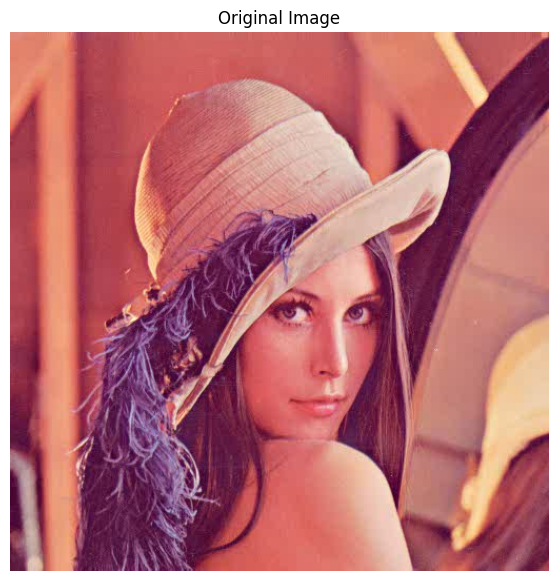

In [4]:
# Load and Display the Image
image_path = 'lena.q100.jq20.jpg'  # Replace with the correct path to your image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(7, 7))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


### Plot the Histogram

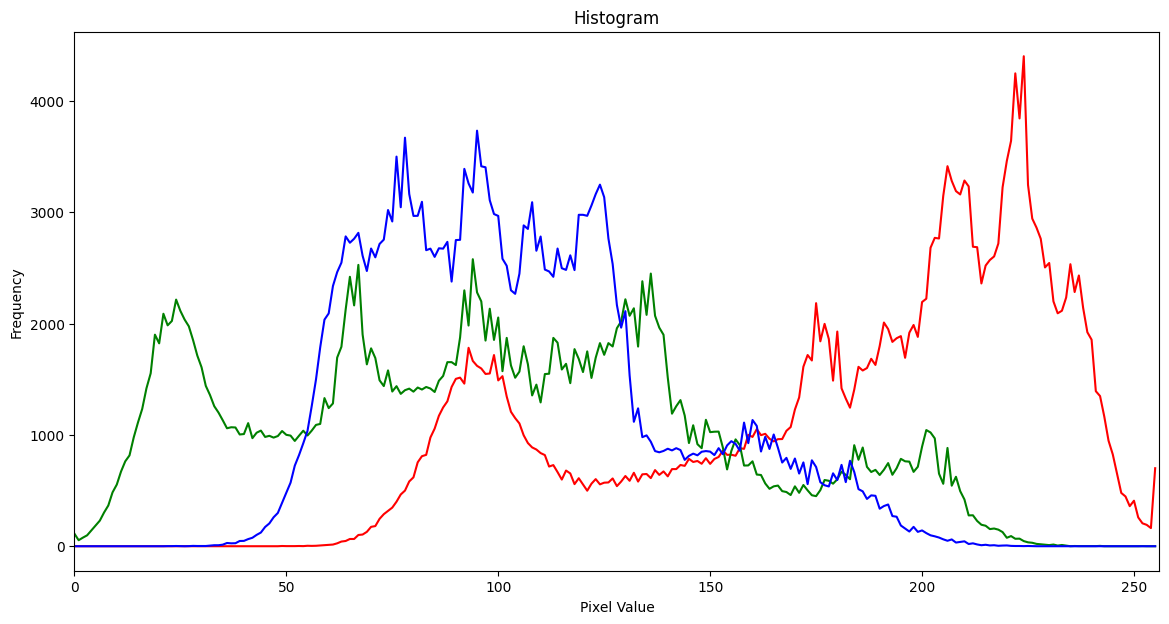

In [5]:
# Plot the Histogram
plt.figure(figsize=(14, 7))
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.show()


###  Upsampling Techniques

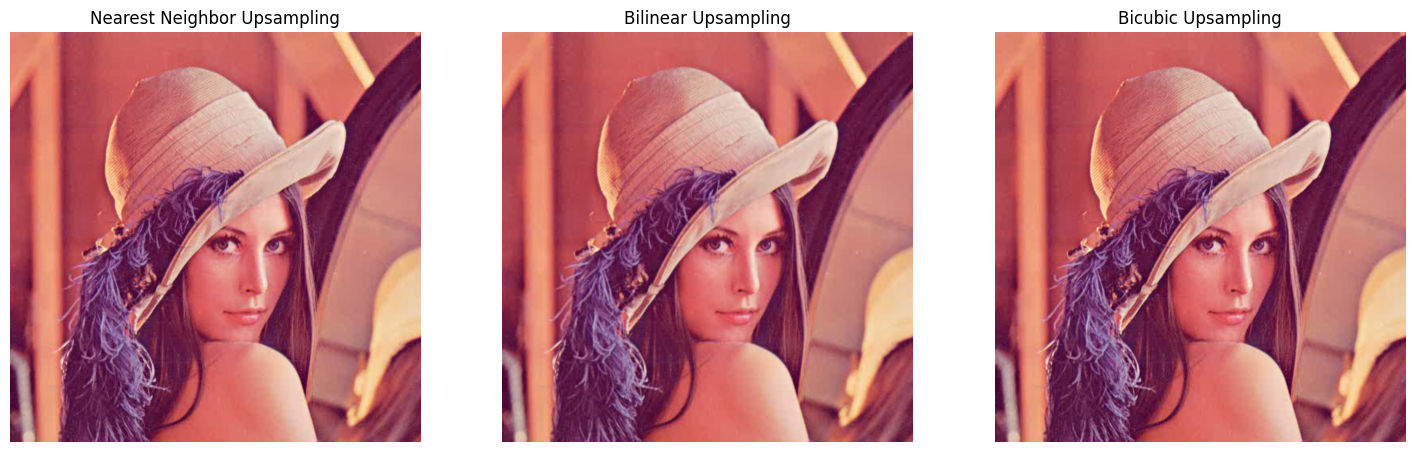

In [6]:
# Nearest Neighbor Interpolation
def nearest_neighbor_interpolation(image, scale):
    height, width, channels = image.shape
    new_height, new_width = int(height * scale), int(width * scale)
    upsampled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            x = min(height - 1, int(i / scale))
            y = min(width - 1, int(j / scale))
            upsampled_image[i, j] = image[x, y]
    
    return upsampled_image

# Perform Upsampling
scale = 2
nearest_neighbor_image = nearest_neighbor_interpolation(image_rgb, scale)
bilinear_image = cv2.resize(image_rgb, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
bicubic_image = cv2.resize(image_rgb, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)

# Display Upsampled Images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(nearest_neighbor_image)
plt.title('Nearest Neighbor Upsampling')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bilinear_image)
plt.title('Bilinear Upsampling')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bicubic_image)
plt.title('Bicubic Upsampling')
plt.axis('off')

plt.show()


### Downsampling Techniques

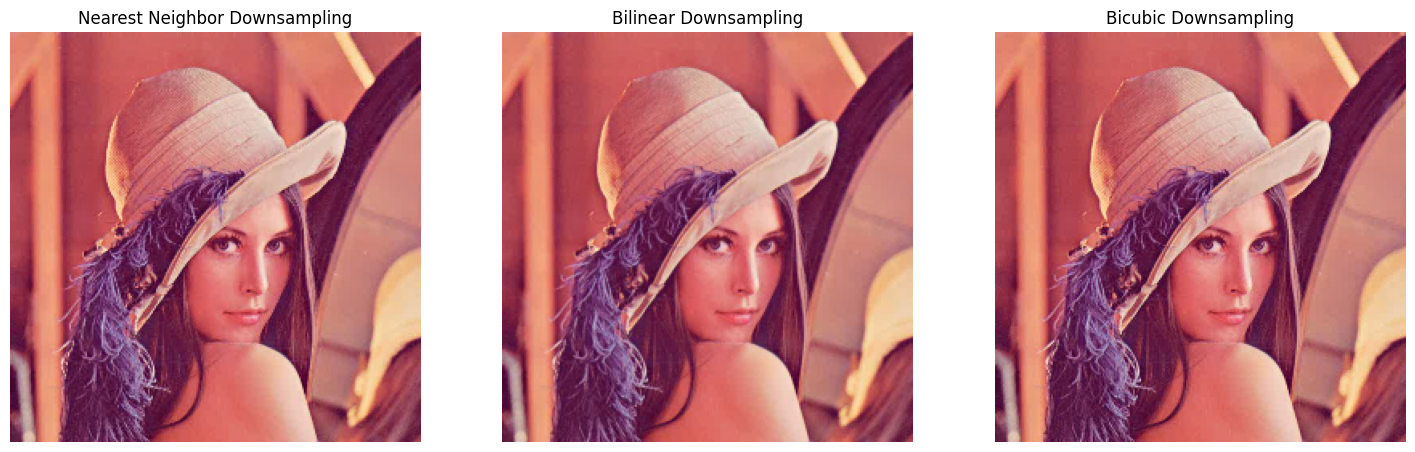

In [7]:
# Downsampling Techniques
def downsample(image, scale, method):
    height, width = image.shape[:2]
    new_height, new_width = int(height * scale), int(width * scale)
    return cv2.resize(image, (new_width, new_height), interpolation=method)

scale = 0.5
downsampled_nn = downsample(image_rgb, scale, method=cv2.INTER_NEAREST)
downsampled_bilinear = downsample(image_rgb, scale, method=cv2.INTER_LINEAR)
downsampled_bicubic = downsample(image_rgb, scale, method=cv2.INTER_CUBIC)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(downsampled_nn)
plt.title('Nearest Neighbor Downsampling')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(downsampled_bilinear)
plt.title('Bilinear Downsampling')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(downsampled_bicubic)
plt.title('Bicubic Downsampling')
plt.axis('off')

plt.show()
